In [1]:
import sklearn.metrics

# import autosklearn.regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_pickle("libra_dataset.pkl")  

In [3]:
df.head()

,point,room,anchor,channel,polarity,reference_power,pdda_input_real,pdda_input_imag,relative_power,x_tag,...,el_anchor,true_phi,pdda_out_az,pdda_theta,z_anchor,x_anchor,pdda_phi,los,az_anchor,pdda_out_el
0,1,testbench_01_furniture_high_concrete,4,37,H,-31.3,"[0.01372, -0.01012, -0.00687, 0.01233, 0.01073]","[0.00571, 0.01097, -0.01324, 0.00829, 0.01032]",-36.5,44.1,...,0.0,180.0,"[0.73581, 0.7359, 0.73618, 0.73664, 0.73728, 0...",66.4,2.5,44.3,-12.6,0,45.0,"[0.009, 0.00903, 0.00913, 0.00928, 0.0095, 0.0..."
1,1,testbench_01_furniture_high_concrete,4,37,V,-32.4,"[0.01108, -0.00818, -0.00552, 0.00992, 0.00867]","[0.00457, 0.00886, -0.01071, 0.00671, 0.00832]",-38.4,44.1,...,0.0,180.0,"[0.76021, 0.7603, 0.76055, 0.76098, 0.76158, 0...",66.6,2.5,44.3,-13.2,0,45.0,"[0.00866, 0.00869, 0.00878, 0.00893, 0.00915, ..."
2,1,testbench_01_furniture_high_concrete,4,38,H,-30.7,"[0.00049, -0.01329, 0.00847, -0.00214, -0.00451]","[0.01379, -0.00419, -0.01115, 0.01381, 0.01312]",-37.1,44.1,...,0.0,180.0,"[0.74357, 0.74366, 0.74394, 0.7444, 0.74505, 0...",66.0,2.5,44.3,-12.4,0,45.0,"[0.00971, 0.00975, 0.00984, 0.01, 0.01023, 0.0..."
3,1,testbench_01_furniture_high_concrete,4,38,V,-32.7,"[0.00044, -0.01187, 0.00759, -0.00194, -0.00402]","[0.01226, -0.00374, -0.00998, 0.01234, 0.0117]",-38.1,44.1,...,0.0,180.0,"[0.74788, 0.74797, 0.74825, 0.74872, 0.74937, ...",66.1,2.5,44.3,-12.4,0,45.0,"[0.00966, 0.00969, 0.00979, 0.00995, 0.01018, ..."
4,1,testbench_01_furniture_high_concrete,4,39,H,-31.0,"[-0.0083, 0.0136, -0.00073, -0.00616, -0.00362]","[-0.01164, -0.00397, 0.01411, -0.01278, -0.01376]",-37.0,44.1,...,0.0,180.0,"[0.72584, 0.72593, 0.72621, 0.72666, 0.7273, 0...",65.6,2.5,44.3,-12.3,0,45.0,"[0.01053, 0.01057, 0.01066, 0.01083, 0.01106, ..."


In [4]:
mid_concrete = df[df['room'] == 'testbench_01_furniture_mid_concrete']

In [5]:
mid_concrete = mid_concrete.sort_values(['point', 'anchor', 'channel'])

In [6]:
mid_concrete['mask'] = mid_concrete['reference_power'] + mid_concrete['relative_power']

In [7]:
mid_concrete = mid_concrete.sort_values(['point', 'anchor', 'channel', 'mask'])

In [8]:
# select to use either Vertical or Horizontal polarity based on reference and relative power
mid_concrete = mid_concrete.drop_duplicates(subset=['point', 'anchor', 'channel'], keep='first')

In [9]:
mid_concrete.head()

,point,room,anchor,channel,polarity,reference_power,pdda_input_real,pdda_input_imag,relative_power,x_tag,...,true_phi,pdda_out_az,pdda_theta,z_anchor,x_anchor,pdda_phi,los,az_anchor,pdda_out_el,mask
13,1,testbench_01_furniture_mid_concrete,4,37,V,-32.4,"[0.01108, -0.00818, -0.00552, 0.00992, 0.00867]","[0.00457, 0.00886, -0.01071, 0.00671, 0.00832]",-38.4,44.1,...,180.0,"[0.76021, 0.7603, 0.76055, 0.76098, 0.76158, 0...",66.6,2.5,44.3,-13.2,0,45.0,"[0.00866, 0.00869, 0.00878, 0.00893, 0.00915, ...",-70.8
15,1,testbench_01_furniture_mid_concrete,4,38,V,-32.7,"[0.00044, -0.01187, 0.00759, -0.00194, -0.00402]","[0.01226, -0.00374, -0.00998, 0.01234, 0.0117]",-38.1,44.1,...,180.0,"[0.74788, 0.74797, 0.74825, 0.74872, 0.74937, ...",66.1,2.5,44.3,-12.4,0,45.0,"[0.00966, 0.00969, 0.00979, 0.00995, 0.01018, ...",-70.8
17,1,testbench_01_furniture_mid_concrete,4,39,V,-31.8,"[-0.00645, 0.01056, -0.00054, -0.00482, -0.00281]","[-0.00908, -0.00309, 0.01095, -0.00992, -0.0107]",-39.1,44.1,...,180.0,"[0.69913, 0.69922, 0.69951, 0.7, 0.70068, 0.70...",65.4,2.5,44.3,-11.7,0,45.0,"[0.01082, 0.01085, 0.01095, 0.01112, 0.01135, ...",-70.9
168,2,testbench_01_furniture_mid_concrete,1,37,H,-31.3,"[0.00178, 0.00283, 0.004, 0.01545, 0.00351]","[0.0078, 0.01179, 0.01278, -0.00741, -0.01988]",-36.6,44.1,...,45.0,"[0.23097, 0.23112, 0.23158, 0.23233, 0.23338, ...",-1.2,2.5,57.9,38.1,0,135.0,"[0.05372, 0.05378, 0.05396, 0.05427, 0.0547, 0...",-67.9
170,2,testbench_01_furniture_mid_concrete,1,38,H,-30.7,"[-0.01427, -0.01734, -0.01851, -0.00478, -0.00...","[0.00902, 0.01202, 0.01495, 0.01268, 0.00665]",-35.2,44.1,...,45.0,"[0.0175, 0.01749, 0.01745, 0.01737, 0.01728, 0...",-1.6,2.5,57.9,13.0,0,135.0,"[0.0196, 0.01963, 0.01972, 0.01988, 0.0201, 0....",-65.9


In [10]:
mid_concrete.describe()

,point,anchor,reference_power,relative_power,x_tag,y_tag,z_tag,y_anchor,true_theta,el_anchor,true_phi,pdda_theta,z_anchor,x_anchor,pdda_phi,los,az_anchor,mask
count,29268.000000,29268.000000,29268.000000,29268.000000,29268.000000,29268.000000,29268.0,29268.000000,29268.000000,29268.0,29268.000000,29268.000000,29268.0,29268.000000,29268.000000,29268.000000,29268.000000,29268.000000
mean,1227.329643,2.499897,-31.807595,-21.115956,51.010312,46.505023,1.5,46.649313,-9.661398,0.0,0.036757,-4.231273,2.5,51.097212,0.105959,0.734215,180.027675,-52.923551
std,707.928188,1.118145,0.712244,7.171141,4.044980,2.020040,0.0,3.350057,8.252372,0.0,27.647466,17.589107,0.0,6.800116,32.902376,0.441758,100.641275,7.119841
min,1.000000,1.000000,-32.700000,-82.300000,44.100000,43.100000,1.5,43.300000,-90.000000,0.0,-135.000000,-90.500000,2.5,44.300000,-90.500000,0.000000,45.000000,-113.600000
25%,612.750000,1.000000,-32.400000,-25.200000,47.500000,44.700000,1.5,43.300000,-10.525000,0.0,-24.000000,-12.500000,2.5,44.300000,-22.100000,0.000000,135.000000,-57.000000
50%,1230.000000,3.000000,-31.800000,-20.300000,51.100000,46.500000,1.5,43.300000,-7.200000,0.0,0.000000,-4.900000,2.5,44.300000,2.000000,1.000000,135.000000,-52.100000
75%,1841.000000,3.000000,-31.000000,-16.200000,54.500000,48.300000,1.5,50.000000,-5.200000,0.0,24.000000,3.300000,2.5,57.900000,23.400000,1.000000,315.000000,-48.100000
max,2450.000000,4.000000,-30.700000,-2.200000,57.900000,49.900000,1.5,50.000000,-3.700000,0.0,180.000000,90.500000,2.5,57.900000,90.500000,1.000000,315.000000,-33.400000


C:\Users\nini\Anaconda3\envs\libra\lib\site-packages\seaborn\axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


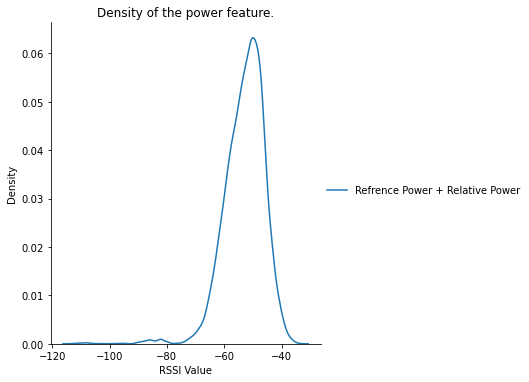

In [11]:
features = ['reference_power', 'relative_power']
# 'pdda_input_real', 'pdda_input_imag'
p = sns.displot(mid_concrete['reference_power'] + mid_concrete['relative_power'], kind="kde")
p.set(title='Density of the power feature.')
p.set(xlabel = "RSSI Value")
p.add_legend(labels=["Refrence Power + Relative Power"])

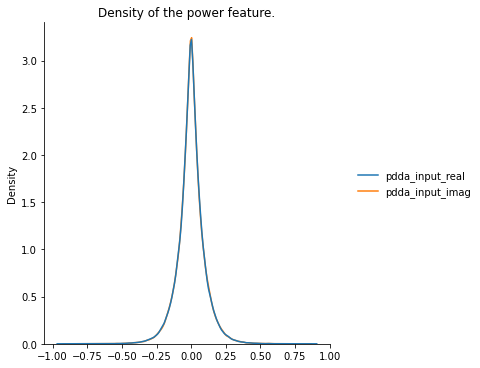

In [12]:
features = ['pdda_input_real', 'pdda_input_imag']
# 'pdda_input_real', 'pdda_input_imag'
unpacked = mid_concrete.explode(['pdda_input_real', 'pdda_input_imag'])
p = sns.displot(unpacked[features], kind="kde")
p.set(title='Density of the power feature.')
p.set(xlabel = "")
# p.add_legend(labels=["Refrence Power + Relative Power"])

In [13]:

def iq_processing(data):
    
    """
    Input: Data
    Output: Processed Data

    Processing: Power Scaling, IQ shifting
    """

    cols_real = ['pdda_input_real_{}'.format(x+1) for x in range(5)]
    cols_imag = ['pdda_input_imag_{}'.format(x+1) for x in range(5)]

    iq_values = pd.DataFrame(data['pdda_input_real'].tolist(), columns=cols_real, index=data.index)
    iq_values[cols_imag] = pd.DataFrame(data['pdda_input_imag'].tolist(), columns=cols_imag, index=data.index)
    
    phase = pd.DataFrame(np.arctan2(iq_values['pdda_input_imag_1'],iq_values['pdda_input_real_1']), columns=['phase_1'])
    
    cos = np.cos(phase).values.ravel()
    sin = np.sin(phase).values.ravel()
    
    out = data.copy()
    iq_ref = np.abs(iq_values[f'pdda_input_real_1']*cos + iq_values[f'pdda_input_imag_1']*sin)
    for i in range(1,6):
        out[f'pdda_input_real_{i}'] = (iq_values[f'pdda_input_real_{i}']*cos + iq_values[f'pdda_input_imag_{i}']*sin)
        out[f'pdda_input_imag_{i}'] = (-iq_values[f'pdda_input_real_{i}']*sin + iq_values[f'pdda_input_imag_{i}']*cos)
        iq_ref +=  iq_values[f'pdda_input_real_{i}']**2 + iq_values[f'pdda_input_imag_{i}']**2

    power_norm =  StandardScaler().fit_transform((out['reference_power'] + out['relative_power']).values.reshape(-1,1))/10
    
    out.insert(25, 'power', power_norm)
    out.insert(24, 'iq_ref', iq_ref)
    out.drop(columns=['pdda_input_imag_1', 'pdda_input_real', 'pdda_input_imag'], inplace=True)
    return out

In [14]:
mid_concrete = iq_processing(mid_concrete)

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [16]:
mid_concrete.head()

,point,room,anchor,channel,polarity,reference_power,relative_power,x_tag,y_tag,z_tag,y_anchor,true_theta,el_anchor,true_phi,pdda_out_az,pdda_theta,z_anchor,x_anchor,pdda_phi,los,az_anchor,pdda_out_el,iq_ref,mask,power,pdda_input_real_1,pdda_input_real_2,pdda_input_imag_2,pdda_input_real_3,pdda_input_imag_3,pdda_input_real_4,pdda_input_imag_4,pdda_input_real_5,pdda_input_imag_5
13,1,testbench_01_furniture_mid_concrete,4,37,V,-32.4,-38.4,44.1,43.1,1.5,43.3,-74.2,0.0,180.0,"[0.76021, 0.7603, 0.76055, 0.76098, 0.76158, 0...",66.6,2.5,44.3,-13.2,0,45.0,"[0.00866, 0.00869, 0.00878, 0.00893, 0.00915, ...",0.012708,-70.8,-0.251084,0.011985,-0.004184,0.011310,-0.009187,-0.007796,0.011729,0.002421,0.011187,0.004386
15,1,testbench_01_furniture_mid_concrete,4,38,V,-32.7,-38.1,44.1,43.1,1.5,43.3,-74.2,0.0,180.0,"[0.74788, 0.74797, 0.74825, 0.74872, 0.74937, ...",66.1,2.5,44.3,-12.4,0,45.0,"[0.00966, 0.00969, 0.00979, 0.00995, 0.01018, ...",0.013040,-70.8,-0.251084,0.012268,-0.004163,0.011728,-0.009701,-0.007943,0.012262,0.002381,0.011548,0.004437
17,1,testbench_01_furniture_mid_concrete,4,39,V,-31.8,-39.1,44.1,43.1,1.5,43.3,-74.2,0.0,180.0,"[0.69913, 0.69922, 0.69951, 0.7, 0.70068, 0.70...",65.4,2.5,44.3,-11.7,0,45.0,"[0.01082, 0.01085, 0.01095, 0.01112, 0.01135, ...",0.011747,-70.9,-0.252488,0.011138,-0.003596,0.010398,-0.008614,-0.006782,0.010879,0.001815,0.010350,0.003906
168,2,testbench_01_furniture_mid_concrete,1,37,H,-31.3,-36.6,44.1,43.3,1.5,43.3,-4.1,0.0,45.0,"[0.23097, 0.23112, 0.23158, 0.23233, 0.23338, ...",-1.2,2.5,57.9,38.1,0,135.0,"[0.05372, 0.05378, 0.05396, 0.05427, 0.0547, 0...",0.009092,-67.9,-0.210352,0.008001,0.012124,-0.000136,0.013350,-0.001056,-0.003787,-0.016711,-0.018601,-0.007845
170,2,testbench_01_furniture_mid_concrete,1,38,H,-30.7,-35.2,44.1,43.3,1.5,43.3,-4.1,0.0,45.0,"[0.0175, 0.01749, 0.01745, 0.01737, 0.01728, 0...",-1.6,2.5,57.9,13.0,0,135.0,"[0.0196, 0.01963, 0.01972, 0.01988, 0.0201, 0....",0.018407,-65.9,-0.182261,0.016882,0.021080,-0.000896,0.023634,-0.002747,0.010815,-0.008164,0.004382,-0.005098


In [17]:
list(mid_concrete)

['point',
 'room',
 'anchor',
 'channel',
 'polarity',
 'reference_power',
 'relative_power',
 'x_tag',
 'y_tag',
 'z_tag',
 'y_anchor',
 'true_theta',
 'el_anchor',
 'true_phi',
 'pdda_out_az',
 'pdda_theta',
 'z_anchor',
 'x_anchor',
 'pdda_phi',
 'los',
 'az_anchor',
 'pdda_out_el',
 'iq_ref',
 'mask',
 'power',
 'pdda_input_real_1',
 'pdda_input_real_2',
 'pdda_input_imag_2',
 'pdda_input_real_3',
 'pdda_input_imag_3',
 'pdda_input_real_4',
 'pdda_input_imag_4',
 'pdda_input_real_5',
 'pdda_input_imag_5']

In [18]:
features = ['power', 'pdda_input_real_1', 'pdda_input_real_2', 'pdda_input_imag_2', 'pdda_input_real_3', 'pdda_input_imag_3', 'pdda_input_real_4', 'pdda_input_imag_4',
           'pdda_input_real_5', 'pdda_input_imag_5']
targets = ['point', 'anchor', 'channel', 'pdda_out_az','true_phi', 'true_theta', 'x_tag', 'y_tag', 'pdda_angle']

In [19]:
mid_concrete.drop(mid_concrete.columns.difference(features+targets), 1, inplace=True)

C:\Users\nini\AppData\Local\Temp\ipykernel_22144\693901583.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mid_concrete.drop(mid_concrete.columns.difference(features+targets), 1, inplace=True)


In [20]:
mid_concrete = mid_concrete.sort_values(['point'])

In [21]:
mid_concrete.reset_index(drop=True, inplace=True)

In [22]:
mid_concrete.head(10)

,point,anchor,channel,x_tag,y_tag,true_theta,true_phi,pdda_out_az,power,pdda_input_real_1,pdda_input_real_2,pdda_input_imag_2,pdda_input_real_3,pdda_input_imag_3,pdda_input_real_4,pdda_input_imag_4,pdda_input_real_5,pdda_input_imag_5
0,1,4,37,44.1,43.1,-74.2,180.0,"[0.76021, 0.7603, 0.76055, 0.76098, 0.76158, 0...",-0.251084,0.011985,-0.004184,0.011310,-0.009187,-0.007796,0.011729,0.002421,0.011187,0.004386
1,1,4,38,44.1,43.1,-74.2,180.0,"[0.74788, 0.74797, 0.74825, 0.74872, 0.74937, ...",-0.251084,0.012268,-0.004163,0.011728,-0.009701,-0.007943,0.012262,0.002381,0.011548,0.004437
2,1,4,39,44.1,43.1,-74.2,180.0,"[0.69913, 0.69922, 0.69951, 0.7, 0.70068, 0.70...",-0.252488,0.011138,-0.003596,0.010398,-0.008614,-0.006782,0.010879,0.001815,0.010350,0.003906
3,2,4,39,44.1,43.3,-78.7,135.0,"[0.86268, 0.86268, 0.86268, 0.86268, 0.86268, ...",0.181518,0.304980,-0.346243,-0.195315,-0.000472,0.459217,0.225018,0.177836,0.271937,0.103367
4,2,4,38,44.1,43.3,-78.7,135.0,"[1.2584, 1.25856, 1.25904, 1.25984, 1.26095, 1...",0.195563,0.249017,-0.235089,-0.348177,-0.430974,0.281732,0.310511,0.126277,0.224577,0.277480
5,2,4,37,44.1,43.3,-78.7,135.0,"[4.20467, 4.20467, 4.20467, 4.20467, 4.20467, ...",0.153427,0.085132,-0.163559,0.134631,0.185525,0.468022,0.096571,-0.091347,0.294341,-0.126878
6,2,3,39,44.1,43.3,-8.5,-46.7,"[0.35014, 0.35011, 0.35002, 0.34987, 0.34965, ...",0.019994,0.101121,0.117743,-0.023083,0.120094,-0.042191,0.025254,-0.014896,-0.032514,-0.101228
7,2,3,37,44.1,43.3,-8.5,-46.7,"[0.07503, 0.0751, 0.07532, 0.07568, 0.07618, 0...",0.005949,0.106314,0.105069,-0.005996,0.094441,-0.012398,0.120254,0.023746,0.048820,0.019018
8,2,3,38,44.1,43.3,-8.5,-46.7,"[0.09516, 0.09526, 0.09554, 0.09602, 0.09669, ...",-0.036188,0.069920,0.084235,-0.011723,0.091084,-0.017685,0.065623,0.015890,0.019597,0.029329
9,2,2,38,44.1,43.3,-3.7,-19.1,"[5.79371, 5.79407, 5.79514, 5.79691, 5.79936, ...",-0.097988,0.016115,0.026815,0.000323,0.037092,0.003745,-0.020225,0.009849,-0.049292,-0.065736


-13

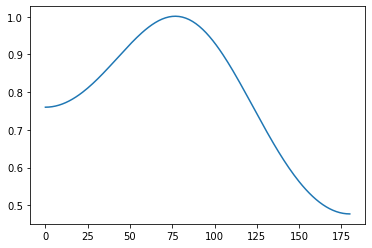

In [23]:
plt.plot(mid_concrete['pdda_out_az'].iloc[0])
# goes from -90 to 90
# argmax 
mid_concrete['pdda_angle'] = mid_concrete['pdda_out_az'].apply(lambda row: np.arange(-90,91,1)[np.argmax(row)])
np.arange(-90,91,1)[np.argmax(mid_concrete['pdda_out_az'].iloc[0])]
# convert from raw pdda to an angle
# check where pdda makes error, and where the best model makes error
# 

In [24]:
# mid_concrete.to_pickle('mid_concrete.pkl')

In [25]:
mid_concrete[]

SyntaxError: invalid syntax (1800587390.py, line 1)

In [ ]:
# add pdda_out_az and make a box plot and check if the median is bigger or not.
# xticks model and y_ticks accuracy and combine hue will be pdda seaborn

In [ ]:
# try multi headed network -> mixture of experts
# pdda and errors next to each other boxplot
# room plot for errors of pdda and random forest
# export figure as pdf -> vector format and adjust afterwards 

In [26]:
peripheral.head()

NameError: name 'peripheral' is not defined

In [27]:
peripheral = mid_concrete[features]
central = mid_concrete['true_phi']

In [28]:
peripheral = peripheral.round(5)

In [25]:

# convert from 64 bit float to 32 bit float

In [29]:
peripheral.head(3)

,power,pdda_input_real_1,pdda_input_real_2,pdda_input_imag_2,pdda_input_real_3,pdda_input_imag_3,pdda_input_real_4,pdda_input_imag_4,pdda_input_real_5,pdda_input_imag_5
0,-0.25108,0.01199,-0.00418,0.01131,-0.00919,-0.00780,0.01173,0.00242,0.01119,0.00439
1,-0.25108,0.01227,-0.00416,0.01173,-0.00970,-0.00794,0.01226,0.00238,0.01155,0.00444
2,-0.25249,0.01114,-0.00360,0.01040,-0.00861,-0.00678,0.01088,0.00182,0.01035,0.00391


In [30]:
peripheral.head(3).to_numpy()

array([[-0.25108,  0.01199, -0.00418,  0.01131, -0.00919, -0.0078 ,
         0.01173,  0.00242,  0.01119,  0.00439],
       [-0.25108,  0.01227, -0.00416,  0.01173, -0.0097 , -0.00794,
         0.01226,  0.00238,  0.01155,  0.00444],
       [-0.25249,  0.01114, -0.0036 ,  0.0104 , -0.00861, -0.00678,
         0.01088,  0.00182,  0.01035,  0.00391]])

In [39]:
filename = "binary_features.bin"
peripheral  = peripheral.astype(np.float32)
fileobj = open(filename, mode='wb')
peripheral.head(20).to_numpy().tofile(fileobj)
fileobj.close

<function BufferedWriter.close>

In [30]:
peripheral.to_numpy().tofile("features.txt", sep=' ')

KeyboardInterrupt: 

In [29]:
np.savetxt('test.txt', peripheral.values, delimiter='\t')